In [9]:
import psycopg2
import pandas as pd

In [55]:
conn = psycopg2.connect(
    host="localhost",
    database="postgres",
    user="postgres",
    password="mysecretpassword")
cur = conn.cursor()

In [60]:
def getTable(name):
  cur.execute('SELECT * from ' + name)
  return pd.DataFrame(cur.fetchall(), columns=[desc[0] for desc in cur.description])

def getAverageMeasure(measure, label):
  cur.execute("select AVG(F."+measure+") as "+label+", C.short_name FROM fact as F, country as C, event as E WHERE F.country_key = C.key and F.event_key = E.key Group by C.short_name")
  print([desc[0] for desc in cur.description]) 
  return pd.DataFrame(cur.fetchall(), columns=[desc[0] for desc in cur.description])



['avg_hdi', 'short_name']
['births', 'short_name']
['deaths', 'short_name']


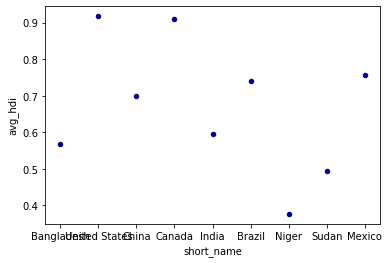

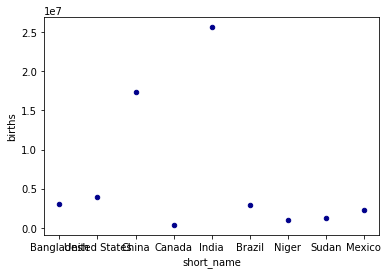

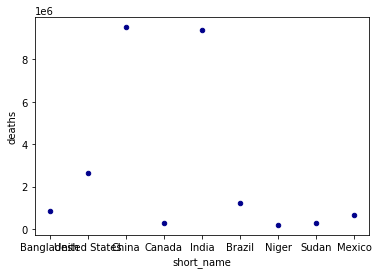

In [62]:
HDI = getAverageMeasure('hdi', 'avg_hdi')
BIRTHS = getAverageMeasure('avg_births', 'births')
DEATHS = getAverageMeasure('avg_deaths', 'deaths')


ax1 = HDI.plot.scatter(x='short_name', y='avg_hdi', c='DarkBlue')
ax1 = BIRTHS.plot.scatter(x='short_name', y='births', c='DarkBlue')
ax1 = DEATHS.plot.scatter(x='short_name', y='deaths', c='DarkBlue')